In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
from copy import deepcopy
import matplotlib.ticker as mticker

In [2]:
with open('./data/.models_full_data/full_data_fit_true_4.obj', 'rb') as infile:
    data_4 = pickle.load(infile)

#with open('./data/.models_full_data/full_data_run_CI_record.obj', 'rb') as infile:
#    data = pickle.load(infile)

with open('./data/.models_full_data/full_data_fit_key_models.obj', 'rb') as infile:
    data = pickle.load(infile)

In [3]:
df_long_3 = pd.read_csv('/mnt/c/Users/vbtes/CompProjects/vbtCogSci/csl_global_analysis/data/accuracy_lf_exp3_nerr.csv')

df_long_4 = pd.read_csv('/mnt/c/Users/vbtes/CompProjects/vbtCogSci/csl_global_analysis/data/accuracy_lf_exp4_nerr.csv')

In [4]:
summary_dfs = [pd.DataFrame(index=np.arange(0, 302)) for _ in [0, 1]]

summary_df = pd.DataFrame(columns=['experiment', 'time', 'posterior_entropy', 'trial_type', 'prior_bf'])

In [5]:
trial_entropies = {
    'normative': {
        'congruent': [],
        'incongruent': []
    },
    'LC_discrete': {
        'congruent': [],
        'incongruent': []
    },
    'LC_discrete_att': {
        'congruent': [],
        'incongruent': []
    },
    'change_obs_fk': {
        'congruent': [],
        'incongruent': []
    }
}
prior_bfs = pd.DataFrame(columns=['pid', 'utid', 'difficulty', 'prior_bf'])

utids = []
for utid, utid_data in data_4.items():
    if utid[0] == '4':
        pid = utid_data['normative_&_1']['pid']
        prior_bf = df_long_4[df_long_4.participant == pid].lc_prior_bf.to_list()[0]

        

        if utid_data['normative_&_1']['difficulty'] in ['congruent', 'incongruent']:
            utids.append(utid)
            prior_bfs.loc[len(prior_bfs.index), :] = [pid, utid, utid_data['normative_&_1']['difficulty'], prior_bf]
            for model, mod_data in utid_data.items():
                if 'prior' in model:
                    continue

                
                trial_entropies[model.split('_&_')[0]][mod_data['difficulty']].append(mod_data['entropy_history'])
                

prior_bfs.prior_bf = prior_bfs.prior_bf.astype(bool)

for model, model_data in trial_entropies.items(): 
    for difficulty, values in model_data.items():
        #print(values)
        trial_entropies[model][difficulty] = np.stack(values, axis=1)

print(trial_entropies.keys())

dict_keys(['normative', 'LC_discrete', 'LC_discrete_att', 'change_obs_fk'])


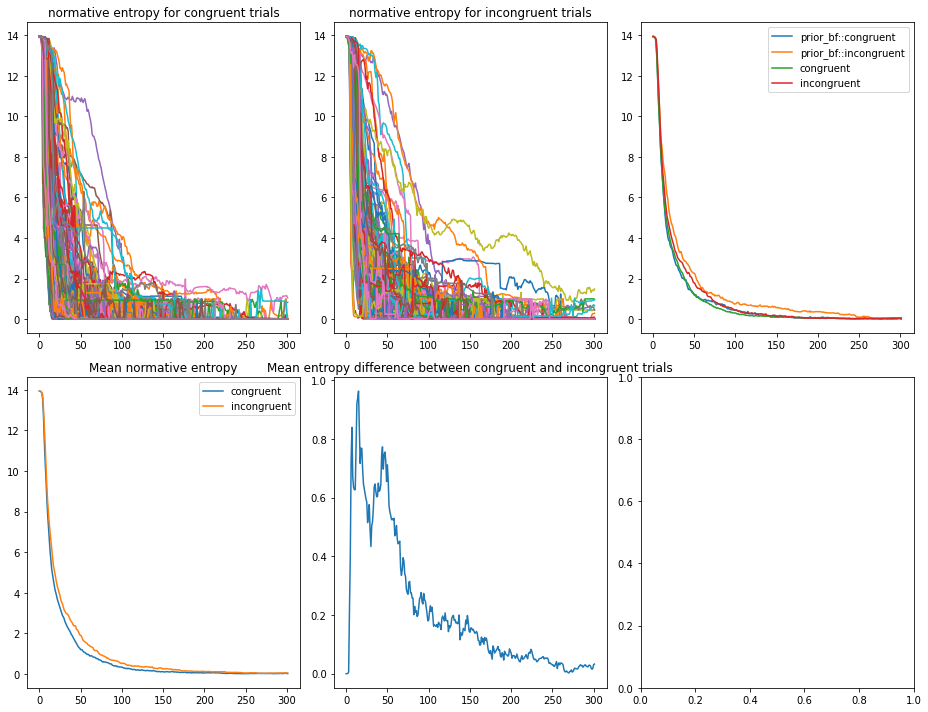

In [6]:
model = 'normative'
normative_entropy = trial_entropies[model]

prior_bf_list_congruent = prior_bfs[prior_bfs.difficulty == 'congruent'].prior_bf.to_numpy()
prior_bf_list_incongruent = prior_bfs[prior_bfs.difficulty == 'incongruent'].prior_bf.to_numpy()

fig, axs = plt.subplots(2, 3, figsize=(13, 10))

axs[0, 0].plot(normative_entropy['congruent'])
axs[0, 0].set_title(f'{model} entropy for congruent trials')

axs[0, 1].plot(normative_entropy['incongruent'])
axs[0, 1].set_title(f'{model} entropy for incongruent trials')

axs[1, 0].plot(np.nanmean(normative_entropy['congruent'], axis=1), label='congruent')
axs[1, 0].plot(np.nanmean(normative_entropy['incongruent'], axis=1), label='incongruent')

summary_dfs[1]['congruent_mean'] = np.nanmean(normative_entropy['congruent'], axis=1)
summary_dfs[1]['congruent_std'] = np.nanstd(normative_entropy['congruent'], axis=1)
summary_dfs[1]['incongruent_mean'] = np.nanmean(normative_entropy['incongruent'], axis=1)
summary_dfs[1]['incongruent_std'] = np.nanstd(normative_entropy['incongruent'], axis=1)

axs[1, 0].set_title(f'Mean {model} entropy')
axs[1, 0].legend()

axs[1, 1].plot(np.nanmean(normative_entropy['incongruent'], axis=1) - np.nanmean(normative_entropy['congruent'], axis=1))
axs[1, 1].set_title('Mean entropy difference between congruent and incongruent trials')

axs[0, 2].plot(np.nanmean(normative_entropy['congruent'][:, prior_bf_list_congruent], axis=1), label='prior_bf::congruent')
axs[0, 2].plot(np.nanmean(normative_entropy['incongruent'][:, prior_bf_list_incongruent], axis=1), label='prior_bf::incongruent')
axs[0, 2].plot(np.nanmean(normative_entropy['congruent'][:, ~prior_bf_list_congruent], axis=1), label='congruent')
axs[0, 2].plot(np.nanmean(normative_entropy['incongruent'][:, ~prior_bf_list_incongruent], axis=1), label='incongruent')

summary_dfs[1]['prior_bf_congruent_mean'] = np.nanmean(normative_entropy['congruent'][:, prior_bf_list_congruent], axis=1)
summary_dfs[1]['prior_bf_congruent_std'] = np.nanstd(normative_entropy['congruent'][:, prior_bf_list_congruent], axis=1)
summary_dfs[1]['prior_bf_incongruent_mean'] = np.nanmean(normative_entropy['incongruent'][:, prior_bf_list_incongruent], axis=1)
summary_dfs[1]['prior_bf_incongruent_std'] = np.nanstd(normative_entropy['incongruent'][:, prior_bf_list_incongruent], axis=1)
summary_dfs[1]['no_prior_congruent_mean'] = np.nanmean(normative_entropy['congruent'][:, ~prior_bf_list_congruent], axis=1)
summary_dfs[1]['no_prior_congruent_std'] = np.nanstd(normative_entropy['congruent'][:, ~prior_bf_list_congruent], axis=1)
summary_dfs[1]['no_prior_incongruent_mean'] = np.nanmean(normative_entropy['incongruent'][:, ~prior_bf_list_incongruent], axis=1)
summary_dfs[1]['no_prior_incongruent_std'] = np.nanstd(normative_entropy['incongruent'][:, ~prior_bf_list_incongruent], axis=1)

axs[0, 2].legend()

plt.tight_layout()
plt.show()

In [7]:
trial_entropies = {
    'normative': {
        'congruent': [],
        'incongruent': []
    },
    'LC_discrete': {
        'congruent': [],
        'incongruent': []
    },
    'LC_discrete_att': {
        'congruent': [],
        'incongruent': []
    },
    'change_obs_fk': {
        'congruent': [],
        'incongruent': []
    }
}
prior_bfs = pd.DataFrame(columns=['pid', 'utid', 'difficulty', 'prior_bf'])

utids = []
for utid, utid_data in data.items():
    if utid[0] == '3':
        pid = utid_data['normative_&_1']['pid']
        prior_bf = df_long_3[df_long_3.participant == pid].lc_prior_bf.to_list()[0]

        

        if utid_data['normative_&_1']['difficulty'] in ['congruent', 'incongruent']:
            utids.append(utid)
            prior_bfs.loc[len(prior_bfs.index), :] = [pid, utid, utid_data['normative_&_1']['difficulty'], prior_bf]
            for model, mod_data in utid_data.items():
                if 'prior' in model:
                    continue

                
                trial_entropies[model.split('_&_')[0]][mod_data['difficulty']].append(mod_data['entropy_history'])
                

prior_bfs.prior_bf = prior_bfs.prior_bf.astype(bool)

for model, model_data in trial_entropies.items(): 
    for difficulty, values in model_data.items():
        #print(values)
        trial_entropies[model][difficulty] = np.stack(values, axis=1)

print(trial_entropies.keys())

dict_keys(['normative', 'LC_discrete', 'LC_discrete_att', 'change_obs_fk'])


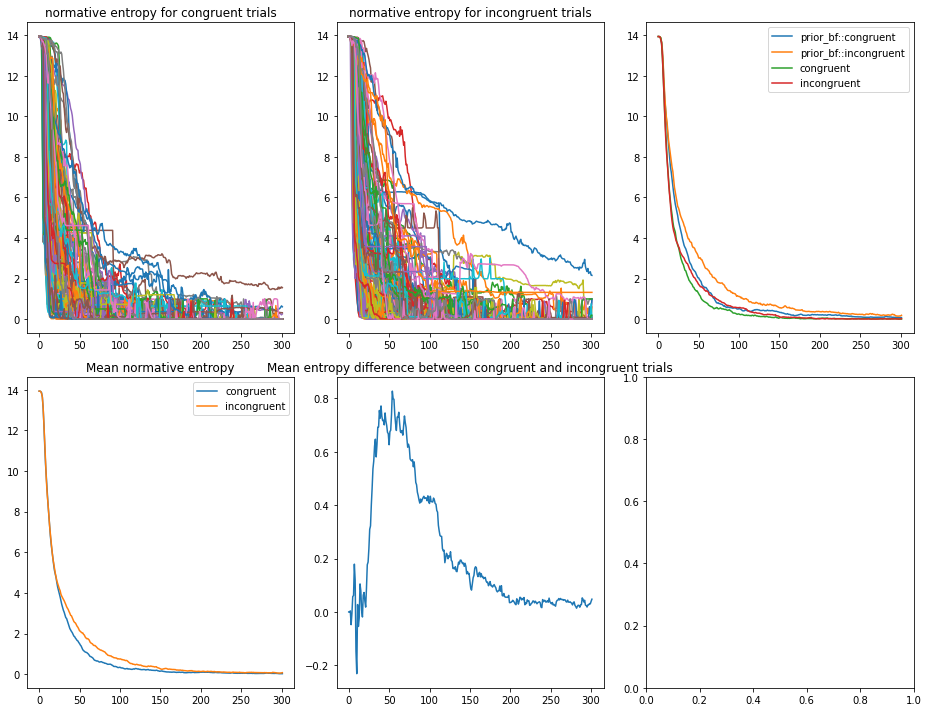

In [8]:
model = 'normative'
normative_entropy = trial_entropies[model]

prior_bf_list_congruent = prior_bfs[prior_bfs.difficulty == 'congruent'].prior_bf.to_numpy()
prior_bf_list_incongruent = prior_bfs[prior_bfs.difficulty == 'incongruent'].prior_bf.to_numpy()

fig, axs = plt.subplots(2, 3, figsize=(13, 10))

axs[0, 0].plot(normative_entropy['congruent'])
axs[0, 0].set_title(f'{model} entropy for congruent trials')

axs[0, 1].plot(normative_entropy['incongruent'])
axs[0, 1].set_title(f'{model} entropy for incongruent trials')

axs[1, 0].plot(np.nanmean(normative_entropy['congruent'], axis=1), label='congruent')
axs[1, 0].plot(np.nanmean(normative_entropy['incongruent'], axis=1), label='incongruent')

summary_dfs[0]['congruent_mean'] = np.nanmean(normative_entropy['congruent'], axis=1)
summary_dfs[0]['congruent_std'] = np.nanstd(normative_entropy['congruent'], axis=1)
summary_dfs[0]['incongruent_mean'] = np.nanmean(normative_entropy['incongruent'], axis=1)
summary_dfs[0]['incongruent_std'] = np.nanstd(normative_entropy['incongruent'], axis=1)

axs[1, 0].set_title(f'Mean {model} entropy')
axs[1, 0].legend()

axs[1, 1].plot(np.nanmean(normative_entropy['incongruent'], axis=1) - np.nanmean(normative_entropy['congruent'], axis=1))
axs[1, 1].set_title('Mean entropy difference between congruent and incongruent trials')

axs[0, 2].plot(np.nanmean(normative_entropy['congruent'][:, prior_bf_list_congruent], axis=1), label='prior_bf::congruent')
axs[0, 2].plot(np.nanmean(normative_entropy['incongruent'][:, prior_bf_list_incongruent], axis=1), label='prior_bf::incongruent')
axs[0, 2].plot(np.nanmean(normative_entropy['congruent'][:, ~prior_bf_list_congruent], axis=1), label='congruent')
axs[0, 2].plot(np.nanmean(normative_entropy['incongruent'][:, ~prior_bf_list_incongruent], axis=1), label='incongruent')

summary_dfs[0]['prior_bf_congruent_mean'] = np.nanmean(normative_entropy['congruent'][:, prior_bf_list_congruent], axis=1)
summary_dfs[0]['prior_bf_congruent_std'] = np.nanstd(normative_entropy['congruent'][:, prior_bf_list_congruent], axis=1)
summary_dfs[0]['prior_bf_incongruent_mean'] = np.nanmean(normative_entropy['incongruent'][:, prior_bf_list_incongruent], axis=1)
summary_dfs[0]['prior_bf_incongruent_std'] = np.nanstd(normative_entropy['incongruent'][:, prior_bf_list_incongruent], axis=1)
summary_dfs[0]['no_prior_congruent_mean'] = np.nanmean(normative_entropy['congruent'][:, ~prior_bf_list_congruent], axis=1)
summary_dfs[0]['no_prior_congruent_std'] = np.nanstd(normative_entropy['congruent'][:, ~prior_bf_list_congruent], axis=1)
summary_dfs[0]['no_prior_incongruent_mean'] = np.nanmean(normative_entropy['incongruent'][:, ~prior_bf_list_incongruent], axis=1)
summary_dfs[0]['no_prior_incongruent_std'] = np.nanstd(normative_entropy['incongruent'][:, ~prior_bf_list_incongruent], axis=1)

axs[0, 2].legend()
plt.tight_layout()
plt.show()

In [9]:
summary_dfs

[     congruent_mean  congruent_std  incongruent_mean  incongruent_std  \
 0         13.931569   1.776357e-15         13.931569     1.776357e-15   
 1         13.931569   1.776357e-15         13.931569     1.776357e-15   
 2         13.908676   2.837222e-02         13.912546     2.422966e-02   
 3         13.862184   8.108517e-02         13.814481     4.666749e-01   
 4         13.644755   7.312179e-01         13.639287     8.972094e-01   
 ..              ...            ...               ...              ...   
 297        0.022838   1.489319e-01          0.049423     2.650275e-01   
 298        0.023259   1.559306e-01          0.054528     2.760457e-01   
 299        0.023207   1.535119e-01          0.053461     2.750469e-01   
 300        0.023857   1.602999e-01          0.063627     2.726553e-01   
 301        0.023526   1.563636e-01          0.071382     2.912489e-01   
 
      prior_bf_congruent_mean  prior_bf_congruent_std  \
 0                  13.931569            5.329071e-15

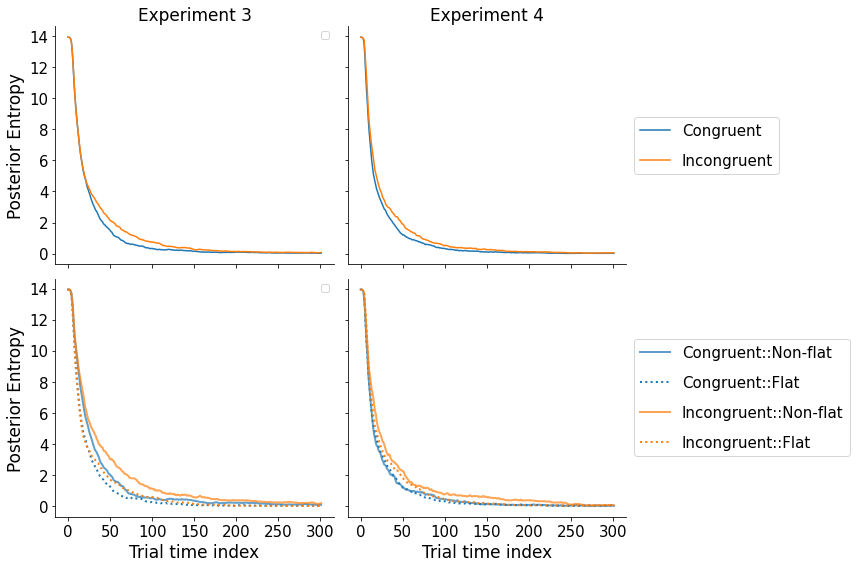

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)

palette = sns.color_palette()
lw=2
alpha=0.7
for i, exp in enumerate(['3', '4']):

    sns.lineplot(data=summary_dfs[i].congruent_mean, ax=axs[0, i], label='Congruent')
    sns.lineplot(data=summary_dfs[i].incongruent_mean, ax=axs[0, i], label='Incongruent')


    sns.lineplot(data=summary_dfs[i].prior_bf_congruent_mean, ax=axs[1, i], label='Congruent::Non-flat', color=palette[0], alpha=alpha, lw=lw)
    sns.lineplot(data=summary_dfs[i].no_prior_congruent_mean, ax=axs[1, i], label='Congruent::Flat', color=palette[0], linestyle='dotted', lw=lw)
    sns.lineplot(data=summary_dfs[i].prior_bf_incongruent_mean, ax=axs[1, i], label='Incongruent::Non-flat', color=palette[1], alpha=alpha, lw=lw)
    sns.lineplot(data=summary_dfs[i].no_prior_incongruent_mean, ax=axs[1, i], label='Incongruent::Flat', color=palette[1], linestyle='dotted', lw=lw)


    axs[1, i].set_xlabel('Trial time index',  fontsize=17)
    ticks_loc = axs[1, i].get_xticks().tolist()
    axs[1, i].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    axs[1, i].set_xticklabels([int(x) for x in ticks_loc], fontsize=15)

    axs[0, i].set_title(f'Experiment {i+3}', fontsize=17)
    
    if i == 0:
        axs[0, i].legend([])
        axs[1, i].legend([])

        

        axs[0, i].set_ylabel('Posterior Entropy',  fontsize=17)
        axs[1, i].set_ylabel('Posterior Entropy',  fontsize=17)

        for j in range(2):
            ticks_loc = axs[j, i].get_yticks().tolist()
            axs[j, i].yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            axs[j, i].set_yticklabels([int(x) for x in ticks_loc], fontsize=15)
        #axs[0, i].set_yticklabels(axs[0, i].get_yticklabels(), fontsize=15)
        #axs[1, i].set_yticklabels(axs[1, i].get_yticklabels(), fontsize=15)
        
    else:
        handles, labels = axs[0, i].get_legend_handles_labels()
        axs[0, i].legend(handles[0:2], labels[0:2], fontsize=15, labelspacing=1, loc=6, bbox_to_anchor=(1, 0.5))
        handles, labels = axs[1, i].get_legend_handles_labels()
        axs[1, i].legend(handles[0:4], labels[0:4], fontsize=15, labelspacing=1, loc=6, bbox_to_anchor=(1, 0.5))

sns.despine()
plt.tight_layout()
plt.show()

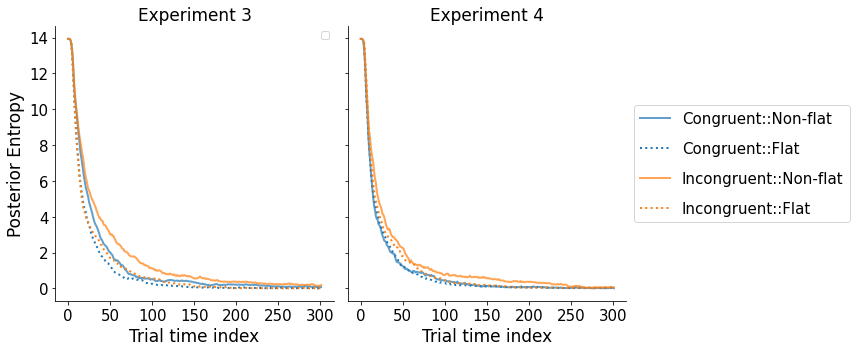

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

palette = sns.color_palette()
lw=2
alpha=0.7
for i, exp in enumerate(['3', '4']):



    sns.lineplot(data=summary_dfs[i].prior_bf_congruent_mean, ax=axs[i], label='Congruent::Non-flat', color=palette[0], alpha=alpha, lw=lw)
    sns.lineplot(data=summary_dfs[i].no_prior_congruent_mean, ax=axs[i], label='Congruent::Flat', color=palette[0], linestyle='dotted', lw=lw)
    sns.lineplot(data=summary_dfs[i].prior_bf_incongruent_mean, ax=axs[i], label='Incongruent::Non-flat', color=palette[1], alpha=alpha, lw=lw)
    sns.lineplot(data=summary_dfs[i].no_prior_incongruent_mean, ax=axs[i], label='Incongruent::Flat', color=palette[1], linestyle='dotted', lw=lw)


    axs[i].set_xlabel('Trial time index',  fontsize=17)
    ticks_loc = axs[i].get_xticks().tolist()
    axs[i].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    axs[i].set_xticklabels([int(x) for x in ticks_loc], fontsize=15)

    axs[i].set_title(f'Experiment {i+3}', fontsize=17)
    
    if i == 0:
        axs[i].legend([])


    
        axs[i].set_ylabel('Posterior Entropy',  fontsize=17)

 
        ticks_loc = axs[i].get_yticks().tolist()
        axs[i].yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        axs[i].set_yticklabels([int(x) for x in ticks_loc], fontsize=15)
        #axs[0, i].set_yticklabels(axs[0, i].get_yticklabels(), fontsize=15)
        #axs[1, i].set_yticklabels(axs[1, i].get_yticklabels(), fontsize=15)
        
    else:
        handles, labels = axs[i].get_legend_handles_labels()
        axs[i].legend(handles[0:4], labels[0:4], fontsize=15, labelspacing=1, loc=6, bbox_to_anchor=(1, 0.5))

sns.despine()
plt.tight_layout()
plt.show()

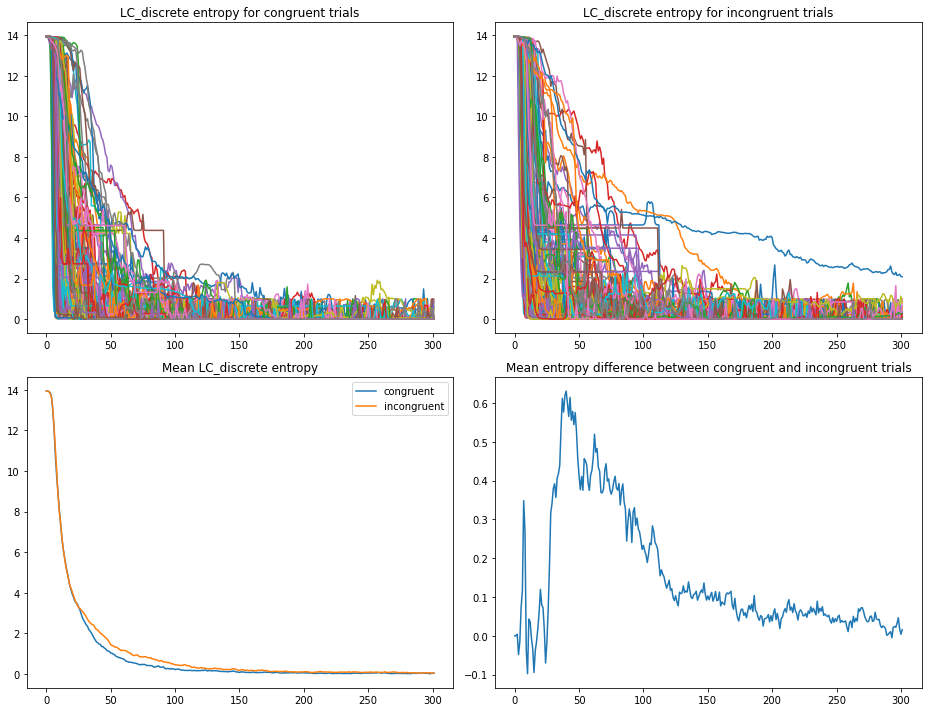

In [11]:
model = 'LC_discrete'
normative_entropy = trial_entropies[model]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

axs[0, 0].plot(normative_entropy['congruent'])
axs[0, 0].set_title(f'{model} entropy for congruent trials')

axs[0, 1].plot(normative_entropy['incongruent'])
axs[0, 1].set_title(f'{model} entropy for incongruent trials')

axs[1, 0].plot(np.nanmean(normative_entropy['congruent'], axis=1), label='congruent')
axs[1, 0].plot(normative_entropy['incongruent'].mean(axis=1), label='incongruent')
axs[1, 0].set_title(f'Mean {model} entropy')
axs[1, 0].legend()

axs[1, 1].plot(np.nanmean(normative_entropy['incongruent'] - normative_entropy['congruent'], axis=1))
axs[1, 1].set_title('Mean entropy difference between congruent and incongruent trials')

plt.tight_layout()
plt.show()

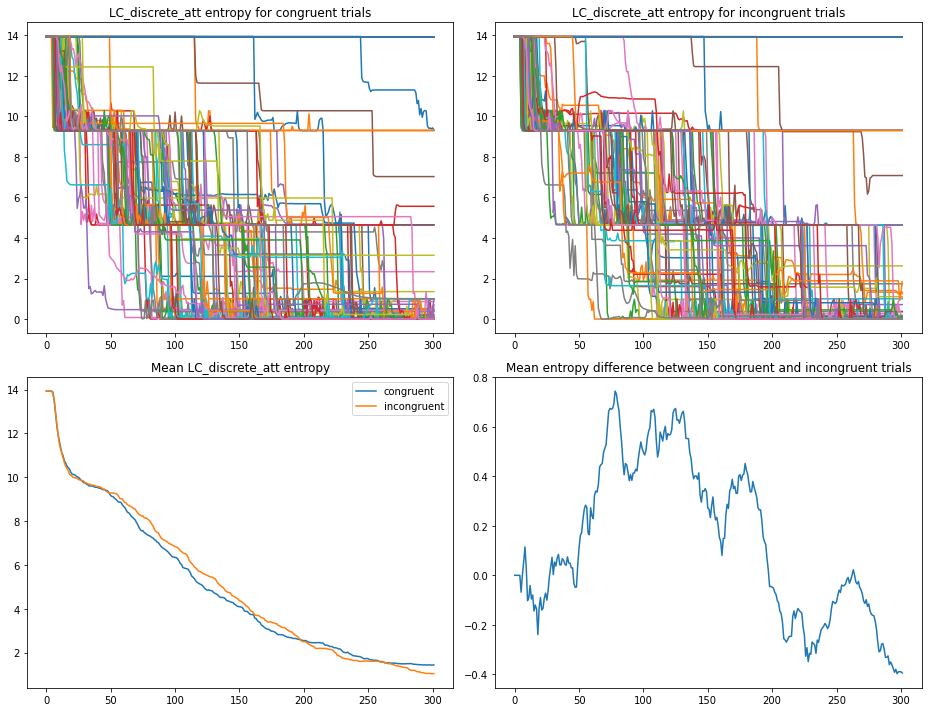

In [12]:
model = 'LC_discrete_att'
normative_entropy = trial_entropies[model]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

axs[0, 0].plot(normative_entropy['congruent'])
axs[0, 0].set_title(f'{model} entropy for congruent trials')

axs[0, 1].plot(normative_entropy['incongruent'])
axs[0, 1].set_title(f'{model} entropy for incongruent trials')

axs[1, 0].plot(np.nanmean(normative_entropy['congruent'], axis=1), label='congruent')
axs[1, 0].plot(normative_entropy['incongruent'].mean(axis=1), label='incongruent')
axs[1, 0].set_title(f'Mean {model} entropy')
axs[1, 0].legend()

axs[1, 1].plot(np.nanmean(normative_entropy['incongruent'] - normative_entropy['congruent'], axis=1))
axs[1, 1].set_title('Mean entropy difference between congruent and incongruent trials')

plt.tight_layout()
plt.show()

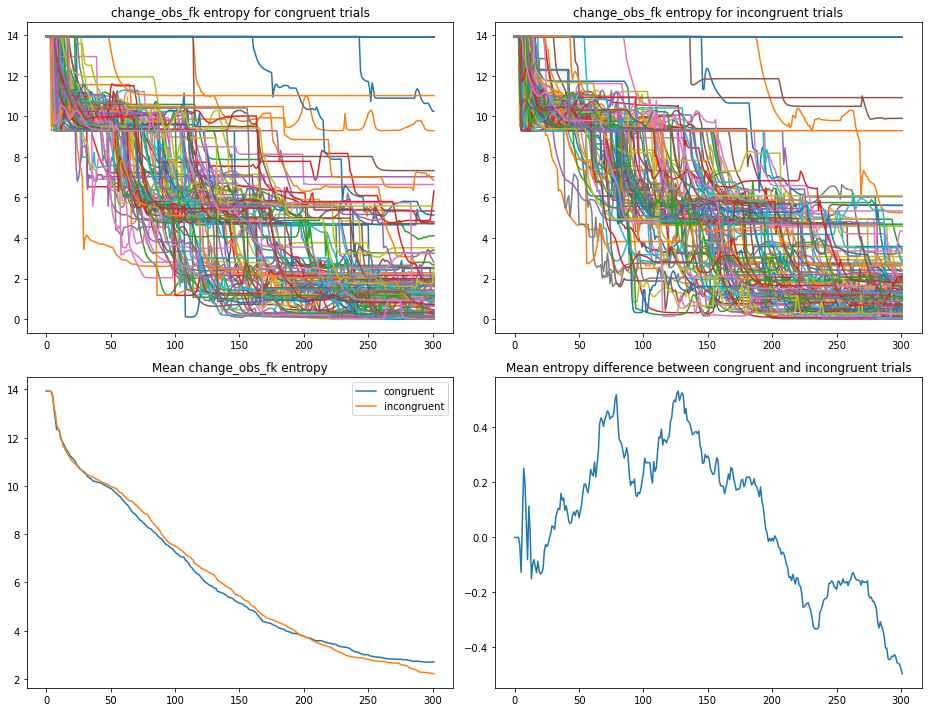

In [13]:
model = 'change_obs_fk'
normative_entropy = trial_entropies[model]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

axs[0, 0].plot(normative_entropy['congruent'])
axs[0, 0].set_title(f'{model} entropy for congruent trials')

axs[0, 1].plot(normative_entropy['incongruent'])
axs[0, 1].set_title(f'{model} entropy for incongruent trials')

axs[1, 0].plot(np.nanmean(normative_entropy['congruent'], axis=1), label='congruent')
axs[1, 0].plot(normative_entropy['incongruent'].mean(axis=1), label='incongruent')
axs[1, 0].set_title(f'Mean {model} entropy')
axs[1, 0].legend()

axs[1, 1].plot(np.nanmean(normative_entropy['incongruent'] - normative_entropy['congruent'], axis=1))
axs[1, 1].set_title('Mean entropy difference between congruent and incongruent trials')

plt.tight_layout()
plt.show()